## Imports

---





In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
from math import sqrt
from scipy import linalg

## Forces, f

---



In [3]:
def f_0(x):
  return 0

def f_10(x):
  return 10

# FEIM algorithm

---



In [1]:
def FEIM(n,f,epsilon):
    
  x = np.linspace(-2,2,num=n)   #define the grid
  delta_x = x[1]-x[0]     

  U = np.zeros(len(x))

#Obstacle
  g = np.zeros(len(x))

  for i in range(len(g)):     #obstacle equation for all the grid points
    if x[i] >= -2 and x[i] <= -7/4:
      g[i] = 0 
    elif x[i] > -7/4 and x[i] <= -1/2:
      g[i] = -(x[i] + 7/4)*(x[i]+1/2)
    elif x[i] > -1/2 and x[i] <= 0:
      g[i] = 0 
    elif x[i] > 0 and x[i] <= 3/2:
      g[i] = -2*(x[i])**2 + 3*x[i]
    else:
      g[i] = 0   


#Initial State

  for i in range(len(x)):
    U[i] = g[i] 

  dst = 999
  previous = np.array([e for e in U])
  temp=[[e for e in U]]

  c=0
  while dst >= epsilon: # we will only stop iterating when vector of differences is smaler than epsilon
    for i in range(len(U)):
      
      if i == 0:   
        #Apply FEIM step but on the left boundary, g = 0
        U[i] = U[i] - (delta_x**2/2) * np.min(( (-1/delta_x**2)*(-2*U[i]+U[i+1]) + f(x[i]) , U[i] - g[i] )) 

      
      elif i == len(U)-1:
        #Apply FEIM step but on the right boundary, g = 0
        U[i] = U[i] - (delta_x**2/2) * np.min(( (-1/delta_x**2)*(U[i-1]-2*U[i]) + f(x[i]) , U[i] - g[i] ))

      else:
        #for the other points we just apply usual FEIM step
        U[i] = U[i] - (delta_x**2/2) * np.min(( (-1/delta_x**2)*(U[i-1]-2*U[i]+U[i+1]) + f(x[i]) , U[i] - g[i] ))
      
      c+=1 #counter 
      
    dst = np.linalg.norm(U - previous) #calculate norm with the previous soltuion
    previous=np.array([e for e in U]) 

  print("The number of iterations until convergence is: ",c)
  return U, epsilon, c, x, g

In [ ]:
FE_U_50_f0, FE_epsilon_50_f0, FE_c_50_f0, FE_x_50_f0, FE_g_50_f0 = FEIM(50,f_0,1e-12)
FE_U_100_f0, FE_epsilon_100_f0, FE_c_100_f0, FE_x_100_f0, FE_g_100_f0 = FEIM(100,f_0,1e-12)
FE_U_500_f0, FE_epsilon_500_f0, FE_c_500_f0, FE_x_500_f0, FE_g_500_f0 = FEIM(500,f_0,1e-12)
FE_U_1000_f0, FE_epsilon_1000_f0, FE_c_1000_f0, FE_x_1000_f0, FE_g_1000_f0 = FEIM(1000,f_0,1e-12)

FE_U_50_f10, FE_epsilon_50_f10, FE_c_50_f10, FE_x_50_f10, FE_g_50_f10 = FEIM(50,f_10,1e-12)
FE_U_100_f10, FE_epsilon_100_f10, FE_c_100_f10, FE_x_100_f10, FE_g_100_f10 = FEIM(100,f_10,1e-12)
FE_U_500_f10, FE_epsilon_500_f10, FE_c_500_f10, FE_x_500_f10, FE_g_500_f10 = FEIM(500,f_10,1e-12)
FE_U_1000_f10, FE_epsilon_1000_f10, FE_c_1000_f10, FE_x_1000_f10, FE_g_1000_f10 = FEIM(1000,f_10,1e-12)

The number of iterations until convergence is:  74600
The number of iterations until convergence is:  557000
The number of iterations until convergence is:  62798500
The number of iterations until convergence is:  477175000
The number of iterations until convergence is:  1700
The number of iterations until convergence is:  8500
The number of iterations until convergence is:  1104000
The number of iterations until convergence is:  8292000


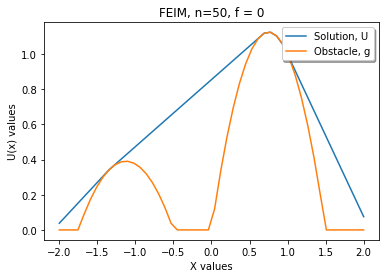

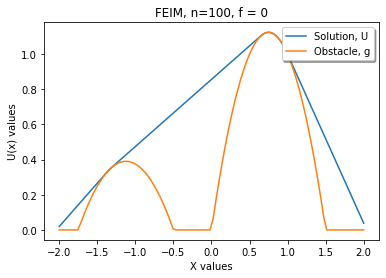

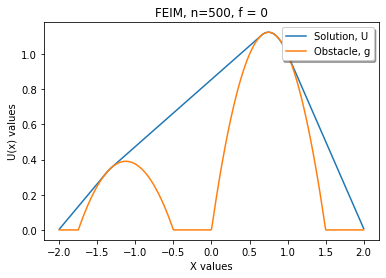

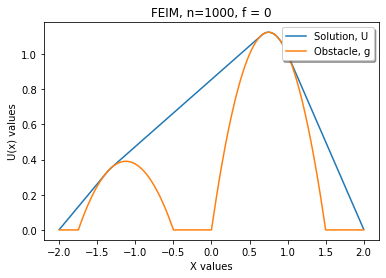

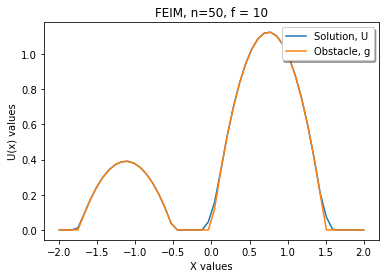

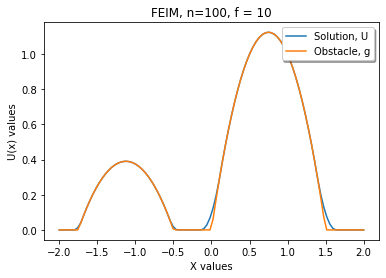

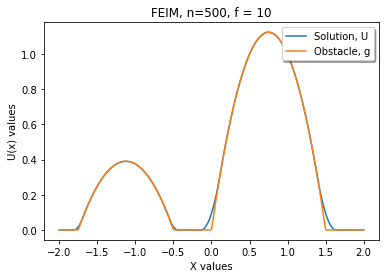

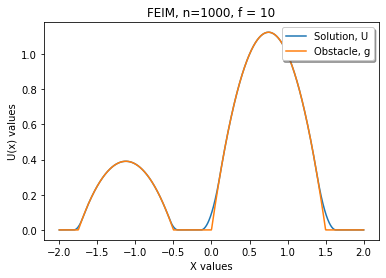

In [ ]:
plt.plot(FE_x_50_f0,FE_U_50_f0)
plt.plot(FE_x_50_f0,FE_g_50_f0)
plt.legend(('Solution, U', 'Obstacle, g'),
           loc='upper right', shadow=True)
plt.xlabel('X values')
plt.ylabel('U(x) values')
plt.title('FEIM, n=50, f = 0')
plt.show()

plt.plot(FE_x_100_f0,FE_U_100_f0)
plt.plot(FE_x_100_f0,FE_g_100_f0)
plt.legend(('Solution, U', 'Obstacle, g'),
           loc='upper right', shadow=True)
plt.xlabel('X values')
plt.ylabel('U(x) values')
plt.title('FEIM, n=100, f = 0')
plt.show()

plt.plot(FE_x_500_f0,FE_U_500_f0)
plt.plot(FE_x_500_f0,FE_g_500_f0)
plt.legend(('Solution, U', 'Obstacle, g'),
           loc='upper right', shadow=True)
plt.xlabel('X values')
plt.ylabel('U(x) values')
plt.title('FEIM, n=500, f = 0')
plt.show()

plt.plot(FE_x_1000_f0,FE_U_1000_f0)
plt.plot(FE_x_1000_f0,FE_g_1000_f0)
plt.legend(('Solution, U', 'Obstacle, g'),
           loc='upper right', shadow=True)
plt.xlabel('X values')
plt.ylabel('U(x) values')
plt.title('FEIM, n=1000, f = 0')
plt.show()

plt.plot(FE_x_50_f10,FE_U_50_f10)
plt.plot(FE_x_50_f10,FE_g_50_f10)
plt.legend(('Solution, U', 'Obstacle, g'),
           loc='upper right', shadow=True)
plt.xlabel('X values')
plt.ylabel('U(x) values')
plt.title('FEIM, n=50, f = 10')
plt.show()

plt.plot(FE_x_100_f10,FE_U_100_f10)
plt.plot(FE_x_100_f10,FE_g_100_f10)
plt.legend(('Solution, U', 'Obstacle, g'),
           loc='upper right', shadow=True)
plt.xlabel('X values')
plt.ylabel('U(x) values')
plt.title('FEIM, n=100, f = 10')
plt.show()

plt.plot(FE_x_500_f10,FE_U_500_f10)
plt.plot(FE_x_500_f10,FE_g_500_f10)
plt.legend(('Solution, U', 'Obstacle, g'),
           loc='upper right', shadow=True)
plt.xlabel('X values')
plt.ylabel('U(x) values')
plt.title('FEIM, n=500, f = 10')
plt.show()

plt.plot(FE_x_1000_f10,FE_U_1000_f10)
plt.plot(FE_x_1000_f10,FE_g_1000_f0)
plt.legend(('Solution, U', 'Obstacle, g'),
           loc='upper right', shadow=True)
plt.xlabel('X values')
plt.ylabel('U(x) values')
plt.title('FEIM, n=1000, f = 10')
plt.show()

In [ ]:
def SSNM(n,f,epsilon):

  x = np.linspace(-2,2,num=n)  #Define grid just like before
  delta_x = x[1]-x[0]
  U = np.zeros(len(x))

  #Obstacle
  g = np.zeros(len(x))

  for i in range(len(g)):  #Define obstacle just like before
    if x[i] >= -2 and x[i] <= -7/4:
      g[i] = 0 
    elif x[i] > -7/4 and x[i] <= -1/2:
      g[i] = -(x[i] + 7/4)*(x[i]+1/2)
    elif x[i] > -1/2 and x[i] <= 0:
      g[i] = 0 
    elif x[i] > 0 and x[i] <= 3/2:
      g[i] = -2*(x[i])**2 + 3*x[i]
    else:
      g[i] = 0   


  dst = 999
  previous=np.array([e for e in U])+999
  U=g

  c=0
  while dst >= epsilon:   #same iterative proceedure as before
    M = np.zeros((len(x)-2,len(x)-2))
    v = np.zeros(len(x)-2)


    for i in range(len(v)):      #Here, we are building the vector with the "min" vector, on the RHS of the equation
      if i == 0: 
        #Apply SSNM step but on the left boundary, g = 0
        v[i] = np.min(((-1/delta_x**2)*(-2*U[i+1]+U[i+2])+f(i+1), U[i+1]-g[i+1]))
      
      if i == len(v)-1:
        #Apply SSNM step but on the right boundary, g = 0
        v[i] = np.min(((-1/delta_x**2)*(U[i]-2*U[i+1])+f(i+1), U[i+1]-g[i+1]))

      else:
        #for the other points we just apply usual SSNM step
        v[i] = np.min(((-1/delta_x**2)*(U[i]-2*U[i+1]+U[i+2])+f(x[i+1]), U[i+1]-g[i+1]))

    for i in range(len(M)):   #Here, we are builind the Jacobian matrix, assuming a<b. After this we will verify if b>=a 
                              #this is not very efficient, but it works. There is no need in including case a=b becuase 
                              #it is a 0 measure set and in numerically speaking a is never equal to b
      if i == 0:
        M[0][0] = (-1/delta_x**2)*-2
        M[0][1] = -1/delta_x**2
      elif i == len(M)-1:
        M[-1][-1] = (-1/delta_x**2)*-2
        M[-1][-2] = -1/delta_x**2
      else:
          M[i][i-1] = -1/delta_x**2
          M[i][i] = (-1/delta_x**2)*-2
          M[i][i+1] = -1/delta_x**2

    #now we will verify if a>b

    if (-1/delta_x**2)*(-2*U[1]+U[2])+f(1) > U[1]-g[1]:
      M[0][0] = 1
      M[0][1] = 0

    if (-1/delta_x**2)*(U[len(v)-1]-2*U[len(v)])+f(len(v)) > U[len(v)]-g[len(v)]:
      M[-1][-1] = 1
      M[-1][-2] = 0

    for i in range(1,len(M)-1):
      if (-1/delta_x**2)*(U[i]-2*U[i+1]+U[i+2])+f(x[i+1]) > U[i+1]-g[i+1]:
        M[i] = 0
        M[i][i] = 1

    #Solve the system of equation 
    sol = linalg.solve(M, v)
    sol = np.insert(sol,obj = 0, values = 0)            #this is just to insert the boundary value 0 on the left and right
    sol = np.insert(sol,obj = len(sol), values = 0 )

    U = U - sol       #the minus corresponds to the minus in the RHS of the equation         
   
    dst = np.linalg.norm(U - previous) #update distance 
    previous=np.array([e for e in U])

    c+=1

  print("The number of iterations until convergence is: ",c)
  return U, epsilon,c,x,g



In [ ]:
SS_U_50_f0, SS_epsilon_50_f0, SS_c_50_f0, SS_x_50_f0, SS_g_50_f0 = SSNM(50,f_0,1e-12)
SS_U_100_f0, SS_epsilon_100_f0, SS_c_100_f0, SS_x_100_f0, SS_g_100_f0 = SSNM(100,f_0,1e-12)
SS_U_500_f0, SS_epsilon_500_f0, SS_c_500_f0, SS_x_500_f0, SS_g_500_f0 = SSNM(500,f_0,1e-12)
SS_U_1000_f0, SS_epsilon_1000_f0, SS_c_1000_f0, SS_x_1000_f0, SS_g_1000_f0 = SSNM(1000,f_0,1e-12)

SS_U_50_f10, SS_epsilon_50_f10, SS_c_50_f10, SS_x_50_f10, SS_g_50_f10 = SSNM(50,f_10,1e-12)
SS_U_100_f10, SS_epsilon_100_f10, SS_c_100_f10, SS_x_100_f10, SS_g_100_f10 = SSNM(100,f_10,1e-12)
SS_U_500_f10, SS_epsilon_500_f10, SS_c_500_f10, SS_x_500_f10, SS_g_500_f10 = SSNM(500,f_10,1e-12)
SS_U_1000_f10, SS_epsilon_1000_f10, SS_c_1000_f10, SS_x_1000_f10, SS_g_1000_f10 = SSNM(1000,f_10,1e-12)

The number of iterations until convergence is:  11
The number of iterations until convergence is:  21
The number of iterations until convergence is:  103
The number of iterations until convergence is:  204
The number of iterations until convergence is:  3
The number of iterations until convergence is:  4
The number of iterations until convergence is:  18
The number of iterations until convergence is:  35


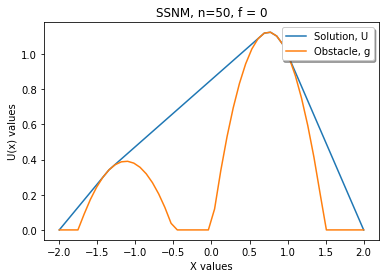

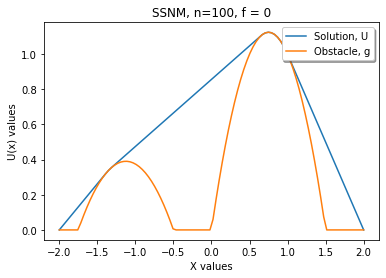

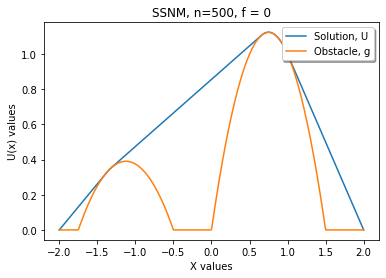

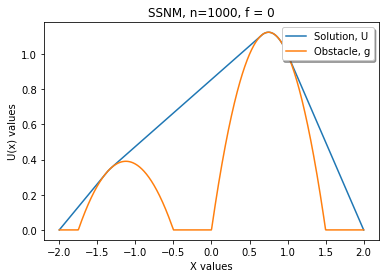

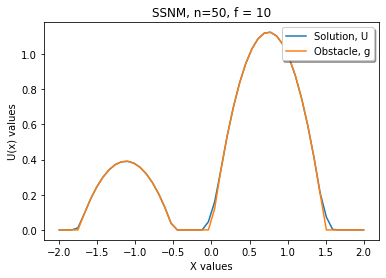

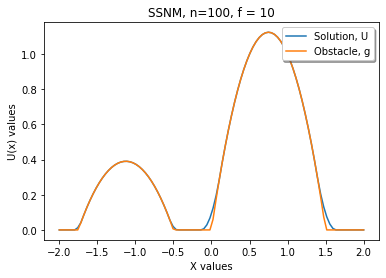

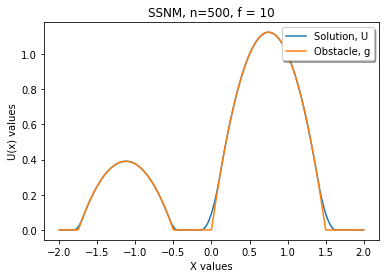

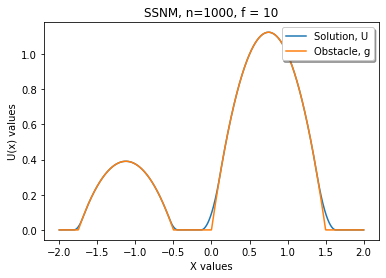

In [11]:
plt.plot(SS_x_50_f0,SS_U_50_f0)
plt.plot(SS_x_50_f0,SS_g_50_f0)
plt.legend(('Solution, U', 'Obstacle, g'),
           loc='upper right', shadow=True)
plt.xlabel('X values')
plt.ylabel('U(x) values')
plt.title('SSNM, n=50, f = 0')
plt.show()

plt.plot(SS_x_100_f0,SS_U_100_f0)
plt.plot(SS_x_100_f0,SS_g_100_f0)
plt.legend(('Solution, U', 'Obstacle, g'),
           loc='upper right', shadow=True)
plt.xlabel('X values')
plt.ylabel('U(x) values')
plt.title('SSNM, n=100, f = 0')
plt.show()

plt.plot(SS_x_500_f0,SS_U_500_f0)
plt.plot(SS_x_500_f0,SS_g_500_f0)
plt.legend(('Solution, U', 'Obstacle, g'),
           loc='upper right', shadow=True)
plt.xlabel('X values')
plt.ylabel('U(x) values')
plt.title('SSNM, n=500, f = 0')
plt.show()

plt.plot(SS_x_1000_f0,SS_U_1000_f0)
plt.plot(SS_x_1000_f0,SS_g_1000_f0)
plt.legend(('Solution, U', 'Obstacle, g'),
           loc='upper right', shadow=True)
plt.xlabel('X values')
plt.ylabel('U(x) values')
plt.title('SSNM, n=1000, f = 0')
plt.show()

plt.plot(SS_x_50_f10,SS_U_50_f10)
plt.plot(SS_x_50_f10,SS_g_50_f10)
plt.legend(('Solution, U', 'Obstacle, g'),
           loc='upper right', shadow=True)
plt.xlabel('X values')
plt.ylabel('U(x) values')
plt.title('SSNM, n=50, f = 10')
plt.show()

plt.plot(SS_x_100_f10,SS_U_100_f10)
plt.plot(SS_x_100_f10,SS_g_100_f10)
plt.legend(('Solution, U', 'Obstacle, g'),
           loc='upper right', shadow=True)
plt.xlabel('X values')
plt.ylabel('U(x) values')
plt.title('SSNM, n=100, f = 10')
plt.show()

plt.plot(SS_x_500_f10,SS_U_500_f10)
plt.plot(SS_x_500_f10,SS_g_500_f10)
plt.legend(('Solution, U', 'Obstacle, g'),
           loc='upper right', shadow=True)
plt.xlabel('X values')
plt.ylabel('U(x) values')
plt.title('SSNM, n=500, f = 10')
plt.show()

plt.plot(SS_x_1000_f10,SS_U_1000_f10)
plt.plot(SS_x_1000_f10,SS_g_1000_f0)
plt.legend(('Solution, U', 'Obstacle, g'),
           loc='upper right', shadow=True)
plt.xlabel('X values')
plt.ylabel('U(x) values')
plt.title('SSNM, n=1000, f = 10')
plt.show()